<a href="https://colab.research.google.com/github/Klnishant/ActivationFunctionAssignment/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu May  9 11:34:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [3]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
ROOT_PATH = '/content/drive/MyDrive/PetImages-20240509T122241Z-001/PetImages'

In [26]:
!pwd

/content


In [27]:
import os
os.chdir(ROOT_PATH)
os.getcwd()

'/content/drive/MyDrive/PetImages-20240509T122241Z-001/PetImages'

In [28]:
!ls

train  validation


In [29]:
IMAGE_SIZE=[224,224]
train_path = 'train'
valid_path = 'validation'

In [30]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 4s 0us/step


In [31]:
for layer in vgg16.layers:
  print(layer)

In [32]:
for layer in vgg16.layers:
  layer.trainable = False

In [33]:
for layer in vgg16.layers:
  print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [34]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [35]:
folders = glob('train/*')

In [36]:
len(folders)

2

In [37]:
model = Sequential()

model.add(vgg16)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21137986 (80.64 MB)
Trainable params: 6423298 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [48]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [49]:
train_data_gen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,vertical_flip=True)
test_data_gen = ImageDataGenerator(rescale=1./255)

In [50]:
!pwd

/content/drive/MyDrive/PetImages-20240509T122241Z-001/PetImages


In [51]:
train_data_set = train_data_gen.flow_from_directory('train',
                                                    target_size = (224,224),
                                                    batch_size = 32,
                                                    class_mode= 'categorical')
test_data_set = test_data_gen.flow_from_directory('validation',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 337 images belonging to 2 classes.
Found 59 images belonging to 2 classes.


In [52]:
h = model.fit(train_data_set, validation_data = test_data_set, epochs = 10, steps_per_epoch=len(train_data_set), validation_steps=len(test_data_set))

Epoch 1/10
11/11 [==============================] - 170s 14s/step - loss: 1.9991 - accuracy: 0.6202 - val_loss: 1.3122 - val_accuracy: 0.5932
Epoch 2/10
11/11 [==============================] - 6s 501ms/step - loss: 0.5766 - accuracy: 0.7953 - val_loss: 1.1009 - val_accuracy: 0.6610
Epoch 3/10
11/11 [==============================] - 7s 653ms/step - loss: 0.6623 - accuracy: 0.7893 - val_loss: 0.3667 - val_accuracy: 0.8644
Epoch 4/10
11/11 [==============================] - 6s 501ms/step - loss: 0.3387 - accuracy: 0.8635 - val_loss: 0.3318 - val_accuracy: 0.8814
Epoch 5/10
11/11 [==============================] - 6s 497ms/step - loss: 0.1432 - accuracy: 0.9377 - val_loss: 0.3470 - val_accuracy: 0.8814
Epoch 6/10
11/11 [==============================] - 6s 580ms/step - loss: 0.1014 - accuracy: 0.9644 - val_loss: 0.3179 - val_accuracy: 0.9153
Epoch 7/10
11/11 [==============================] - 6s 531ms/step - loss: 0.0901 - accuracy: 0.9614 - val_loss: 0.2880 - val_accuracy: 0.9153
Epoch 

In [53]:
import matplotlib.pyplot as plt

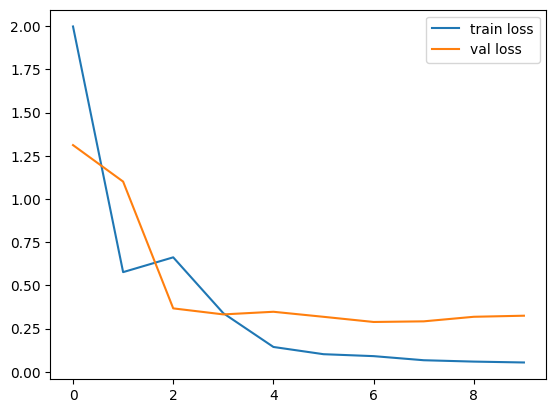

<Figure size 640x480 with 0 Axes>

In [55]:
plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig('lossval_fig')

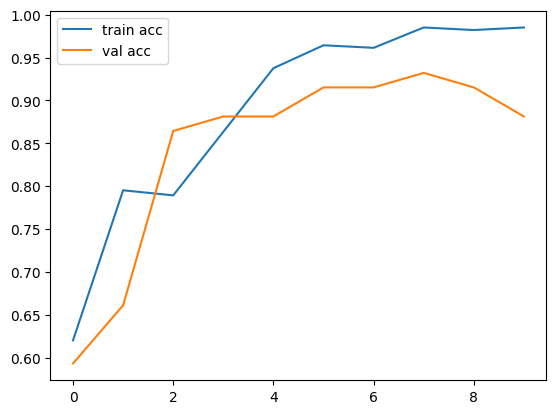

<Figure size 640x480 with 0 Axes>

In [56]:
plt.plot(h.history['accuracy'], label = 'train acc')
plt.plot(h.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()
plt.savefig('acc_fig')

In [57]:
model.save('model_vgg16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [58]:
y_pred = model.predict(test_data_set)

2/2 [==============================] - 1s 286ms/step


In [59]:
print(y_pred)

[[3.05116683e-01 6.94883347e-01]
 [9.52744961e-01 4.72550057e-02]
 [1.86862051e-02 9.81313825e-01]
 [9.96832550e-01 3.16746044e-03]
 [1.37670086e-09 1.00000000e+00]
 [8.80991042e-01 1.19008966e-01]
 [9.67746854e-01 3.22531611e-02]
 [9.12115812e-01 8.78842026e-02]
 [2.10817307e-04 9.99789178e-01]
 [6.17810860e-02 9.38218951e-01]
 [3.35017294e-01 6.64982736e-01]
 [1.34610664e-03 9.98653889e-01]
 [4.81720199e-04 9.99518275e-01]
 [9.98096883e-01 1.90312788e-03]
 [7.32572144e-03 9.92674291e-01]
 [2.56500812e-03 9.97435033e-01]
 [2.14632717e-03 9.97853696e-01]
 [9.98271346e-01 1.72867195e-03]
 [3.71800379e-05 9.99962807e-01]
 [9.62478578e-01 3.75213996e-02]
 [2.36859178e-05 9.99976277e-01]
 [9.77727652e-01 2.22723596e-02]
 [9.65550914e-03 9.90344465e-01]
 [5.41443713e-02 9.45855618e-01]
 [9.80679631e-01 1.93203669e-02]
 [9.78828728e-01 2.11712476e-02]
 [2.00481758e-01 7.99518287e-01]
 [2.92579159e-02 9.70742166e-01]
 [9.99990702e-01 9.32151943e-06]
 [6.89341687e-05 9.99931097e-01]
 [3.027370

In [60]:
y_pred = np.argmax(y_pred, axis =1)

In [61]:
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [63]:
from tensorflow.keras.models import load_model

In [64]:
model = load_model(r'model_vgg16.h5')

In [66]:
img = load_img('cat.jpg', target_size=(224,224))

In [67]:
x= image.img_to_array(img)
x

array([[[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       ...,

       [[ 89.,  70.,  55.],
        [101.,  82.,  67.],
        [116.,  97.,  82.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[ 92.,  73.,  58.],
        [ 98.,  79.,  64.],
        [125., 106.,  91.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[ 82.,  64.,  50.],
        [101.,  83.,  69.],
        [ 92.,  

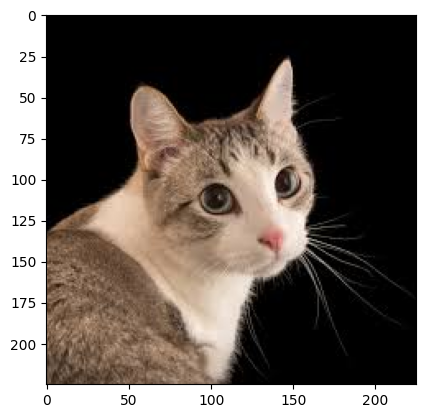

In [68]:
z = plt.imread('cat.jpg')
plt.imshow(z)

In [69]:
x.shape

(224, 224, 3)

In [70]:
x = x/255

In [71]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [72]:
x = np.expand_dims(x, axis = 0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [73]:
model.predict(img_data)

1/1 [==============================] - 2s 2s/step


array([[9.99989867e-01, 1.01261085e-05]], dtype=float32)

In [74]:
result = np.argmax(model.predict(img_data),axis=1)

1/1 [==============================] - 0s 26ms/step


In [75]:
result

array([0])

In [76]:
result[0]

0

In [77]:
if result[0]==1:
  prediction='dog'
  print(prediction)
else:
  prediction='cat'
  print(prediction)

cat
